In [1]:
import os
os.chdir("..")

from pprint import pprint
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tuxai.dataset import Dataset, Columns
from tuxai.misc import config_logger
from tuxai.report import model_metrics, Report, FeatureImportanceReport

config_logger()
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100

fir = FeatureImportanceReport(use_cache="fi_const_2023")

2023-01-25 18:16:33,763 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023


# Options always importants
## (after bug fix)
### without option merging

In [2]:
df_ai = fir.options_always_importants(target="vmlinux", rank=30,collinearity=True, merge_groups=False, allow_version_gap=True).set_index("options")
df_ai

  0%|          | 0/12369 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,1,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS",<NA>,0,0,1,1,1,1
RANDOMIZE_BASE,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
DEBUG_INFO,2,2,2,2,2,2,2
"KASAN, KASAN_OUTLINE",3,3,3,<NA>,<NA>,<NA>,<NA>
"KASAN, KASAN_GENERIC, KASAN_OUTLINE",<NA>,<NA>,<NA>,3,3,3,<NA>
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,5,4,<NA>
UBSAN_SANITIZE_ALL,4,4,4,4,4,8,7


### With option merging

In [3]:
df_ai = fir.options_always_importants(target="vmlinux", rank=30,collinearity=True, merge_groups=True, allow_version_gap=True).set_index("options")
df_ai

  0%|          | 0/12369 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,1,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,0,0,1,1,1,1
DEBUG_INFO,2,2,2,2,2,2,2
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3
"KASAN, KASAN_GENERIC, KASAN_OUTLINE",<NA>,<NA>,<NA>,3,3,3,<NA>
"KASAN, KASAN_GENERIC(5.00, 5.04, 5.07), KASAN_OUTLINE",3,3,3,3,3,3,<NA>
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL(5.08), DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,5,4,3
UBSAN_SANITIZE_ALL,4,4,4,4,4,8,7
DEBUG_INFO_COMPRESSED,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5


## no version gap

In [4]:
df_ai = fir.options_always_importants(target="vmlinux", rank=40, collinearity=True, merge_groups=True, allow_version_gap=False).set_index("options")
df_ai

  0%|          | 0/8665 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,1,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,0,0,1,1,1,1
DEBUG_INFO,2,2,2,2,2,2,2
UBSAN_SANITIZE_ALL,4,4,4,4,4,8,7
DEBUG_INFO_REDUCED,5,6,5,5,6,5,4
"RANDOMIZE_BASE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), X86_NEED_RELOCS",37,0,0,1,1,1,1
DEBUG_INFO_SPLIT,6,5,6,6,8,6,8
GCOV_PROFILE_ALL,7,7,8,7,7,7,6
UBSAN_ALIGNMENT,8,8,7,8,9,9,9


# Options not always importants (stop or start beeing important)

no version gap, merged

In [3]:
df_nai = fir.options_not_always_importants(target="vmlinux", best_rank=30, worst_rank=500, collinearity=True, merge_groups=True, allow_version_gap=False).set_index("options")
df_nai

  0%|          | 0/8344 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
SND_SOC_WM_ADSP,145,181,1210,1154,203,310,29
"CLKSRC_MMIO, COMPILE_TEST(4.13, 4.15, 4.20, 5.00, 5.04), ROCKCHIP_GRF(4.13, 4.15, 4.20, 5.00, 5.04), SOC_ASPEED(5.04)",21,47,80,1305,2161,564,110
"PROVE_LOCKING, PROVE_RCU",48,48,129,4714,12,19,11
"BRANCH_PROFILE_NONE, FTRACE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",25,22,1625,555,1434,1371,1300
XFS_DEBUG,9,10,9,10,11,10,9425
"CLKSRC_MMIO(4.13, 4.15, 4.20, 5.00, 5.04), COMPILE_TEST, IMX_INTMUX(5.07, 5.08), ROCKCHIP_GRF, SOC_ASPEED(5.04, 5.07, 5.08)",21,47,80,1305,2161,5777,234
"REGMAP_AC97(4.13), SND_SOC_AD1980(4.13, 4.15, 4.20, 5.00, 5.04), SND_SOC_AD73311, SND_SOC_ADS117X, SND_SOC_ALL_CODECS, SND_SOC_CQ0093VC, SND_SOC_CS47L15(5.07, 5.08), SND_SOC_CS47L35(5.07, 5.08), SND_SOC_CS47L85(5.07, 5.08), SND_SOC_CS47L90(5.07, 5.08), SND_SOC_CS47L92(5.07, 5.08), SND_SOC_ICS43432, SND_SOC_L3, SND_SOC_MADERA(5.07, 5.08), SND_SOC_PCM3008, SND_SOC_PCM5102A, SND_SOC_STAC9766(4.13, 4.15, 4.20, 5.00, 5.04), SND_SOC_UDA134X, SND_SOC_WL1273(5.07, 5.08), SND_SOC_WM8727, SND_SOC_WM8782(4.13, 4.15), SND_SOC_WM9705(4.13, 4.15, 4.20, 5.00, 5.04), SND_SOC_WM9712(4.13), SND_SOC_WM9713(4.13, 4.15, 4.20, 5.00, 5.04)",85,82,5134,1349,4028,37,21
"BRANCH_PROFILE_NONE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), FTRACE",7749,22,1625,555,1434,1371,1300
GENERIC_TRACER,33,27,499,1913,4145,4432,4798


No version gap, not merged

In [5]:
df_nai = fir.options_not_always_importants(target="vmlinux", best_rank=50, worst_rank=500, collinearity=True, merge_groups=False, allow_version_gap=False).set_index("options")
df_nai

  0%|          | 0/8096 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
"NET, NET_RX_BUSY_POLL, NLATTR",45,113,82,89,532,69,56
XPS,50,52,63,57,216,581,205
"GRACE_PERIOD, LOCKD, SUNRPC",174,39,224,45,153,608,86
AF_RXRPC,130,116,69,40,1154,76,112
GFS2_FS,1437,38,47,48,120,82,69
FUNCTION_TRACER,60,44,92,74,270,1987,48
AC97_BUS,1098,913,216,237,38,55,91
SND_SOC_WM_ADSP,145,181,1210,1154,203,310,29
"PROVE_LOCKING, PROVE_RCU",48,48,129,4714,12,19,11


## Check option YES frequency

In [6]:
fir.add_yes_frequencies(df_nai, str_pct=True)

  0%|          | 0/7 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08,freq 4.13,freq 4.15,freq 4.20,freq 5.00,freq 5.04,freq 5.07,freq 5.08
88EU_AP_MODE,47,8034,8700,8794,9265,9637,9838,0.33%,0.36%,0.38%,0.38%,0.38%,0.39%,0.40%
9P_FS,413,485,50,453,534,3627,3594,3.32%,3.44%,3.42%,3.12%,3.22%,3.43%,3.32%
A11Y_BRAILLE_CONSOLE,3668,938,4288,474,43,177,111,10.06%,10.46%,10.59%,10.34%,10.64%,10.13%,10.76%
AC97_BUS,1098,913,216,237,38,55,91,16.93%,17.12%,16.55%,16.39%,16.17%,15.45%,16.20%
ACPI_HOTPLUG_CPU,70,80,7699,36,61,111,526,13.90%,14.43%,8.23%,16.92%,19.54%,19.77%,20.36%
AF_RXRPC,130,116,69,40,1154,76,112,14.67%,15.25%,14.93%,14.45%,14.64%,15.05%,14.94%
CEPH_LIB,182,463,125,39,169,106,4886,15.97%,16.30%,16.10%,15.69%,16.18%,16.42%,16.36%
CIFS,114,8330,40,97,1853,528,127,5.95%,6.15%,5.99%,5.83%,6.16%,6.10%,6.06%
DEBUG_KMEMLEAK,990,5518,6025,6090,14,15,12,44.16%,43.88%,43.26%,43.54%,44.13%,43.32%,42.74%
DRM_I915_WERROR,6414,137,44,185,1541,279,1406,4.83%,4.92%,4.13%,4.12%,4.02%,4.18%,3.90%


# Drop outliers

<AxesSubplot: ylabel='Frequency'>

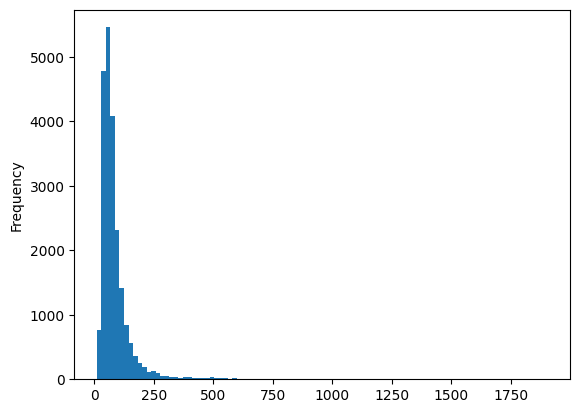

In [5]:
df1 = Dataset(508).get_dataframe(drop_outliers=False)
df1.vmlinux.plot.hist(bins=100)

2023-01-25 17:15:53,439 :: INFO :: tuxai.features :: computing correlation matrix between provided features - it might take a few hours


<AxesSubplot: ylabel='Frequency'>

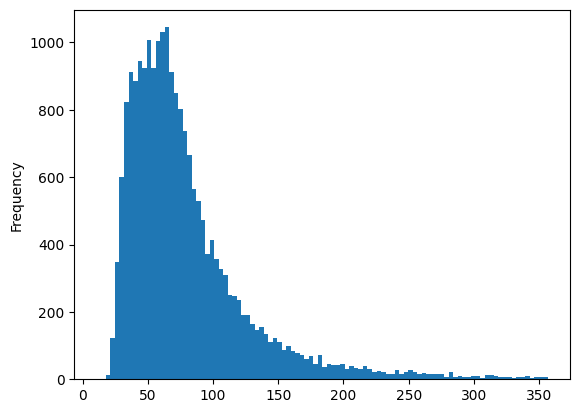

In [6]:
df1 = Dataset(508).get_dataframe(drop_outliers=True)
df1.vmlinux.plot.hist(bins=100)

# Drop outliers

In [2]:
fir_no = FeatureImportanceReport(use_cache="fi_const_2023_no", drop_outliers=True)
df_ai = fir_no.options_always_importants(target="vmlinux", rank=30,collinearity=True, merge_groups=True, allow_version_gap=True).set_index("options")
df_ai

2023-01-25 18:16:53,975 :: INFO :: tuxai.report :: generating feature importance report


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

2023-01-25 18:17:01,142 :: INFO :: tuxai.features :: computing correlation matrix between provided features - it might take a few hours
2023-01-25 20:59:03,519 :: INFO :: tuxai.models :: training model xgboost(413)|39930697ac25323bebe9b67fdfdf06f6
2023-01-25 21:03:11,642 :: INFO :: tuxai.models :: training model xgboost(413)|04808a9f6fa4e45a82f35cd95cb808f2
2023-01-25 21:07:40,281 :: INFO :: tuxai.models :: training model xgboost(413)|2ed006678f62c043edc92d70971bf28a
2023-01-25 21:11:44,572 :: INFO :: tuxai.models :: training model xgboost(413)|ce0445d5d53cdced9f7ffd8f59bbdae6
2023-01-25 21:16:14,434 :: INFO :: tuxai.models :: training model xgboost(413)|cb53bd8ee12a66edecd41bbeec8c9f31
2023-01-25 21:20:18,463 :: INFO :: tuxai.models :: training model xgboost(413)|98e5794d009171b4b47fd6840393681b
2023-01-25 21:24:46,523 :: INFO :: tuxai.models :: training model xgboost(413)|a4c0097fab4b60298d454d94babbbc54
2023-01-25 21:28:52,896 :: INFO :: tuxai.models :: training model xgboost(413)|b

  0%|          | 0/7 [00:00<?, ?it/s]

2023-01-25 21:58:52,416 :: INFO :: tuxai.features :: computing correlation matrix between provided features - it might take a few hours
2023-01-25 23:06:41,578 :: INFO :: tuxai.models :: training model xgboost(415)|bf3818b15ace7203d3da410bbea67096
2023-01-25 23:08:27,684 :: INFO :: tuxai.models :: training model xgboost(415)|54d4dd6d86cfb0a9709b6022cb96e0f6
2023-01-25 23:10:25,674 :: INFO :: tuxai.models :: training model xgboost(415)|3efd256670d636c37339b3b77c6d1161
2023-01-25 23:12:11,974 :: INFO :: tuxai.models :: training model xgboost(415)|13f9cf103257da49ab1dbf7d75d03187
2023-01-25 23:14:08,956 :: INFO :: tuxai.models :: training model xgboost(415)|42f06b28069bf3cc1401bab25dbc01c9
2023-01-25 23:15:56,405 :: INFO :: tuxai.models :: training model xgboost(415)|464a1e7f968b01be1db5c4616277502e
2023-01-25 23:17:54,183 :: INFO :: tuxai.models :: training model xgboost(415)|f32ac770569d0a9aa1b90f1009776720
2023-01-25 23:19:41,217 :: INFO :: tuxai.models :: training model xgboost(415)|3

  0%|          | 0/7 [00:00<?, ?it/s]

2023-01-25 23:32:44,294 :: INFO :: tuxai.features :: computing correlation matrix between provided features - it might take a few hours
2023-01-26 00:20:11,366 :: INFO :: tuxai.models :: training model xgboost(420)|c8e45805f1911e54bba1973e10f55866
2023-01-26 00:21:22,514 :: INFO :: tuxai.models :: training model xgboost(420)|9e54667b96b4c914c96ecc636c97e838
2023-01-26 00:22:45,294 :: INFO :: tuxai.models :: training model xgboost(420)|07ac6116553eba1c0a624476e1789b20
2023-01-26 00:23:57,232 :: INFO :: tuxai.models :: training model xgboost(420)|8148f4e48eaa8c99fa0420e196d43831
2023-01-26 00:25:18,510 :: INFO :: tuxai.models :: training model xgboost(420)|97ae6b9971d9fc80d62c622c99c85dba
2023-01-26 00:26:31,527 :: INFO :: tuxai.models :: training model xgboost(420)|617bd36a273f4c24a7a0f902bb415115
2023-01-26 00:27:50,904 :: INFO :: tuxai.models :: training model xgboost(420)|f92e76c3e772a129ea44641b62b655d6
2023-01-26 00:29:02,922 :: INFO :: tuxai.models :: training model xgboost(420)|9

  0%|          | 0/7 [00:00<?, ?it/s]

2023-01-26 00:37:57,935 :: INFO :: tuxai.features :: computing correlation matrix between provided features - it might take a few hours
2023-01-26 01:19:02,668 :: INFO :: tuxai.models :: training model xgboost(500)|1fe8e262524841d8d7f33d1c13d8db3b
2023-01-26 01:20:03,692 :: INFO :: tuxai.models :: training model xgboost(500)|5b34a06280565ce7fffddbe7934ed748
2023-01-26 01:21:15,444 :: INFO :: tuxai.models :: training model xgboost(500)|549ae34451ae35a62f7a6a85834c786c
2023-01-26 01:22:18,340 :: INFO :: tuxai.models :: training model xgboost(500)|036e73e1164d34824459a1f5a844be36
2023-01-26 01:23:29,773 :: INFO :: tuxai.models :: training model xgboost(500)|84e35c6149ff069230259af21921df2b
2023-01-26 01:24:33,243 :: INFO :: tuxai.models :: training model xgboost(500)|880b1b15c0beb3bc180cb09d8c7e1b92
2023-01-26 01:25:45,796 :: INFO :: tuxai.models :: training model xgboost(500)|a262be7060729f79aac486d503dd1ab0
2023-01-26 01:26:47,030 :: INFO :: tuxai.models :: training model xgboost(500)|d

  0%|          | 0/7 [00:00<?, ?it/s]

2023-01-26 01:34:33,167 :: INFO :: tuxai.features :: computing correlation matrix between provided features - it might take a few hours
2023-01-26 02:33:15,566 :: INFO :: tuxai.models :: training model xgboost(504)|54cea7290ee77aa9c993188a412e58d2
2023-01-26 02:34:37,754 :: INFO :: tuxai.models :: training model xgboost(504)|28af178841a29548b5d8eeae0899509e
2023-01-26 02:36:11,617 :: INFO :: tuxai.models :: training model xgboost(504)|d1320fbcb62348cdcd100c833c40cc28
2023-01-26 02:37:35,872 :: INFO :: tuxai.models :: training model xgboost(504)|7ecb57c84b68f549a4c414fae5534c31
2023-01-26 02:39:10,560 :: INFO :: tuxai.models :: training model xgboost(504)|eba3694667557f6a48ab12b46dc57de8
2023-01-26 02:40:32,817 :: INFO :: tuxai.models :: training model xgboost(504)|fedd9849bc00723c7ba8c216e8a7783c
2023-01-26 02:42:07,440 :: INFO :: tuxai.models :: training model xgboost(504)|0f6b7a20d5b527280ea035a7d64bccf8
2023-01-26 02:43:32,061 :: INFO :: tuxai.models :: training model xgboost(504)|7

  0%|          | 0/7 [00:00<?, ?it/s]

2023-01-26 02:53:52,305 :: INFO :: tuxai.features :: computing correlation matrix between provided features - it might take a few hours
2023-01-26 03:44:22,281 :: INFO :: tuxai.models :: training model xgboost(507)|3cdfd69b6620b0474f03cceabe058e5b
2023-01-26 03:45:29,513 :: INFO :: tuxai.models :: training model xgboost(507)|b994d0b8b25df2fb37b7a16894927469
2023-01-26 03:46:50,861 :: INFO :: tuxai.models :: training model xgboost(507)|e6f50f6a83f88c842741808e6966416a
2023-01-26 03:48:00,459 :: INFO :: tuxai.models :: training model xgboost(507)|d6fbd8be2d91460dca32f9d9b8c6c5fc
2023-01-26 03:49:19,964 :: INFO :: tuxai.models :: training model xgboost(507)|ba6f8a8db65a71a4fdc342352eeba315
2023-01-26 03:50:29,804 :: INFO :: tuxai.models :: training model xgboost(507)|7996691e6969594c67e17e48b3eb2010
2023-01-26 03:51:49,870 :: INFO :: tuxai.models :: training model xgboost(507)|4dd9a0cef0e2d51d003823a9d58e6e98
2023-01-26 03:52:58,888 :: INFO :: tuxai.models :: training model xgboost(507)|3

  0%|          | 0/7 [00:00<?, ?it/s]

2023-01-26 04:01:44,275 :: INFO :: tuxai.models :: training model xgboost(508)|1745b5d727fd67f1e3503409dee798be
2023-01-26 04:03:01,444 :: INFO :: tuxai.models :: training model xgboost(508)|f91988f824b182e396c4dff37641f36f
2023-01-26 04:04:28,700 :: INFO :: tuxai.models :: training model xgboost(508)|f6e777af07cef8ee695a608176492633
2023-01-26 04:05:44,841 :: INFO :: tuxai.models :: training model xgboost(508)|e60de8b0c064b34b038a0ef42c362055
2023-01-26 04:07:14,680 :: INFO :: tuxai.models :: training model xgboost(508)|f0f68689f634faf7584f51e335254094
2023-01-26 04:08:30,295 :: INFO :: tuxai.models :: training model xgboost(508)|1bf68c2661231535881a37ace5430736
2023-01-26 04:09:59,203 :: INFO :: tuxai.models :: training model xgboost(508)|0c1c69cc7e8b8d6142bec495b087e9d1
2023-01-26 04:11:13,150 :: INFO :: tuxai.models :: training model xgboost(508)|f024de47a19fe274bb8e38f0c7d22704
2023-01-26 04:12:40,159 :: INFO :: tuxai.models :: training model xgboost(508)|3a2e51003e2353613021c9eac

  0%|          | 0/12369 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,0,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,0,1,1,1,1,1
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2
"KASAN, KASAN_GENERIC, KASAN_OUTLINE",<NA>,<NA>,<NA>,2,2,2,<NA>
"KASAN, KASAN_GENERIC(5.00, 5.04, 5.07), KASAN_OUTLINE",3,2,2,2,2,2,<NA>
DEBUG_INFO,4,3,3,3,3,4,3
"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL(5.08), DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,5,3,2
UBSAN_SANITIZE_ALL,2,4,4,4,4,8,8
DEBUG_INFO_REDUCED,5,6,5,5,6,6,6


# Options always important (merged groups, no version gap)

1 - no outliers

In [16]:
fir_no = FeatureImportanceReport(use_cache="fi_const_2023_no", drop_outliers=True)
df_ai_no = fir_no.options_always_importants(target="vmlinux", rank=200,collinearity=True, merge_groups=True, allow_version_gap=False).set_index("options")
df_ai_no

2023-01-26 09:26:05,325 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023_no


  0%|          | 0/8665 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,0,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,0,1,1,1,1,1
DEBUG_INFO,4,3,3,3,3,4,3
UBSAN_SANITIZE_ALL,2,4,4,4,4,8,8
"RANDOMIZE_BASE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), X86_NEED_RELOCS",31,0,1,1,1,1,1
DEBUG_INFO_REDUCED,5,6,5,5,6,6,6
DEBUG_INFO_SPLIT,6,5,6,8,7,7,5
GCOV_PROFILE_ALL,7,7,8,7,8,5,4
UBSAN_ALIGNMENT,8,8,7,6,9,9,9


2 - with outliers

In [17]:
fir = FeatureImportanceReport(use_cache="fi_const_2023", drop_outliers=True)
df_ai = fir.options_always_importants(target="vmlinux", rank=200,collinearity=True, merge_groups=True, allow_version_gap=False).set_index("options")
df_ai

2023-01-26 09:26:31,597 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023


  0%|          | 0/8665 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,1,0,0,0,0
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",1,0,0,1,1,1,1
DEBUG_INFO,2,2,2,2,2,2,2
UBSAN_SANITIZE_ALL,4,4,4,4,4,8,7
DEBUG_INFO_REDUCED,5,6,5,5,6,5,4
"RANDOMIZE_BASE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), X86_NEED_RELOCS",37,0,0,1,1,1,1
DEBUG_INFO_SPLIT,6,5,6,6,8,6,8
GCOV_PROFILE_ALL,7,7,8,7,7,7,6
UBSAN_ALIGNMENT,8,8,7,8,9,9,9


side by side

In [19]:
df = pd.DataFrame.from_dict({"with_outliers": pd.Series(df_ai.index), "without_outliers": pd.Series(df_ai_no.index)})
df

,with_outliers,without_outliers
0,nb_yes,nb_yes
1,"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)","RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)"
2,DEBUG_INFO,DEBUG_INFO
3,UBSAN_SANITIZE_ALL,UBSAN_SANITIZE_ALL
4,DEBUG_INFO_REDUCED,"RANDOMIZE_BASE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), X86_NEED_RELOCS"
5,"RANDOMIZE_BASE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), X86_NEED_RELOCS",DEBUG_INFO_REDUCED
6,DEBUG_INFO_SPLIT,DEBUG_INFO_SPLIT
7,GCOV_PROFILE_ALL,GCOV_PROFILE_ALL
8,UBSAN_ALIGNMENT,UBSAN_ALIGNMENT
9,KCOV_INSTRUMENT_ALL,KCOV_INSTRUMENT_ALL


In [21]:
set(df.with_outliers) - set(df.without_outliers)

{'CONSTRUCTORS, GCOV_KERNEL(5.08)',
 'DST_CACHE(5.00, 5.07), INET, XFRM(5.04, 5.07, 5.08)',
 'DST_CACHE, INET(5.00, 5.07), XFRM(5.07)',
 'XOR_BLOCKS',
 nan}

In [22]:
set(df.without_outliers) - set(df.with_outliers)

{'AF_RXRPC',
 'BQL, DQL',
 'CEPH_LIB',
 'DRM_TTM',
 'INFINIBAND',
 'MDIO',
 'NET, NET_RX_BUSY_POLL, NLATTR',
 'PROVE_LOCKING, PROVE_RCU',
 'RANDOMIZE_MEMORY'}

In [23]:
fir = FeatureImportanceReport(use_cache="fi_const_2023", drop_outliers=True)
df_ai_comp = fir.options_always_importants(target="GZIP-vmlinux", rank=200,collinearity=True, merge_groups=True, allow_version_gap=False).set_index("options")
df_ai_comp

2023-01-26 09:31:39,229 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023


  0%|          | 0/8665 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08
options,,,,,,,
nb_yes,0,1,1,1,0,0,0
UBSAN_SANITIZE_ALL,2,3,3,3,3,2,1
GCOV_PROFILE_ALL,3,2,2,2,2,4,4
KCOV_INSTRUMENT_ALL,6,4,4,4,5,5,2
UBSAN_ALIGNMENT,4,5,5,5,6,6,3
"PRINTK, PRINTK_NMI",5,7,7,7,8,9,7
"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",9,6,8,8,9,10,8
"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING",14,12,6,6,7,8,6
READABLE_ASM,10,9,9,9,10,11,9


In [24]:
df = pd.DataFrame.from_dict({"vmlinux": pd.Series(df_ai.index), "gzip": pd.Series(df_ai_comp.index)})
df

,vmlinux,gzip
0,nb_yes,nb_yes
1,"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)",UBSAN_SANITIZE_ALL
2,DEBUG_INFO,GCOV_PROFILE_ALL
3,UBSAN_SANITIZE_ALL,KCOV_INSTRUMENT_ALL
4,DEBUG_INFO_REDUCED,UBSAN_ALIGNMENT
5,"RANDOMIZE_BASE(4.15, 4.20, 5.00, 5.04, 5.07, 5.08), X86_NEED_RELOCS","PRINTK, PRINTK_NMI"
6,DEBUG_INFO_SPLIT,"RANDOMIZE_BASE, X86_NEED_RELOCS(4.15, 4.20, 5.00, 5.04, 5.07, 5.08)"
7,GCOV_PROFILE_ALL,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
8,UBSAN_ALIGNMENT,READABLE_ASM
9,KCOV_INSTRUMENT_ALL,DYNAMIC_DEBUG
